## Quicksort

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta

In [2]:
def randomquicksort(alist,times):
    comp = [0]
    randomquicksorthelper(alist,0,len(alist)-1,comp)
    times.append(comp[0])

In [3]:
def randomquicksorthelper(alist,first,last,comp):
    if first<last:

        r = randompartition(alist,first,last)
        splitpoint = r[0]
        tmp = comp.pop()
        comp.append(tmp+r[1])
    
        randomquicksorthelper(alist,first,splitpoint-1,comp)
        randomquicksorthelper(alist,splitpoint+1,last,comp)



In [4]:
def randompartition(alist,first,last):
  
  
    indxpiv = random.randint(first,last)
    temp = alist[indxpiv]
    alist[indxpiv] = alist[first]
    alist[first] = temp
   
    pivotvalue = alist[first]
    compspart = 0

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
            compspart = compspart + 1
        compspart = compspart + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1
            compspart = compspart + 1
        compspart = compspart + 1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark,compspart

In [5]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    time=[]
    for i in range(1,n+1):
        x.append(n+1-i)
        
    exTime=0  
    t1=datetime.now()
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
        y = list(x)
        randomquicksort(y,tlist)
    t2=datetime.now() 
    exTime=(t2-t1).total_seconds()
    
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    theoricMean = (n*math.log(n,2))
    tlist = np.array(tlist)
    mean = np.mean(tlist)
    aux=0
    for i in tlist:
        if i>theoricMean*1.5:
            aux+=1

    aux=aux/runs        
    print "n",n
    print "runs",runs
    print "mean", mean
    print "theoric mean", theoricMean
    print "mean - theoric mean", mean - theoricMean
    print "probablity that time is more than 1.5 theoric mean",  aux,"%"

    print "min",min(tlist)
    print "max",max(tlist)
    print "execution time", exTime, "s"

10 millones de ejecuciones

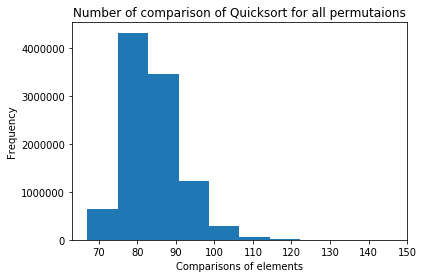

n 16
runs 10000000
mean 83.664581
theoric mean 64.0
mean - theoric mean 19.664581
probablity that time is more than 1.5 theoric mean 0 %
min 67
max 146
execution time 1138.015 s


In [6]:
randomquicksorttimedistrib(16,10000000)

cantidad aproximada de ejecuciones en 5 horas

In [11]:
x=18000*10000000/1138
print x

158172231


In [21]:
def randomquicksorttimedistrib5h(s):
    
    # Create an array of 1 .. n  
    n=s
    runs=0
    x = []
    time=[]
    for i in range(1,n+1):
        x.append(n+1-i)
        
    # Run quicksort for each permutation
    t1=datetime.now()
    t2=datetime.now()
    exTime=(t2-t1).total_seconds()
    tlist =[]
    while exTime<18000:
        y = list(x)
        randomquicksort(y,tlist)
        runs+=1
        t2=datetime.now()
        exTime=(t2-t1).total_seconds()
            
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    theoricMean = (n*math.log(n,2))
    tlist = np.array(tlist)
    mean = np.mean(tlist)
    aux=0
    for i in tlist:
        if i>theoricMean*1.5:
            aux+=1

    aux=aux/runs        
    print "n",n
    print "runs",runs
    print "mean", mean
    print "theoric mean", theoricMean
    print "mean - theoric mean", mean - theoricMean
    print "probablity that time is more than 1.5 theoric mean",  aux,"%"

    print "min",min(tlist)
    print "max",max(tlist)
    print "execution time", exTime, "s"
    
    

Ejecuciones durante 5 hora

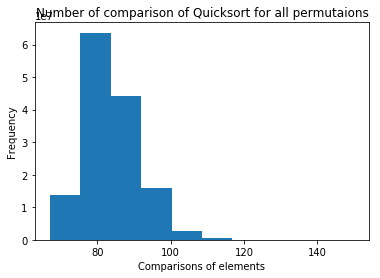

n 16
runs 140842470
mean 83.6667993113
theoric mean 64.0
mean - theoric mean 19.6667993113
probablity that time is more than 1.5 theoric mean 0 %
min 67
max 150
execution time 18000.001 s


In [22]:
randomquicksorttimedistrib5h(16)